In [1]:
import tensorflow as tf
import os
from Script.DataGenerator import DataGenerator
from Script.Metrics_Evaluation import Evaluation
from BiLSTM import BiLSTM, generate_input
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
gpus =tf.config.list_physical_devices('GPU')
if len(gpus):
    print("Running on GPU")
    tf.config.set_visible_devices(gpus[0], 'GPU')
else :
    print("Running on CPU")

Running on GPU


In [3]:
BATCH_SIZE = 16384
EPOCH = 50
ABC2 = os.path.join("..", "..", "ABC2", "ABC_ssm")
DATA_PATH = os.path.join(ABC2, "Train")
VALIDATION_PATH = os.path.join(ABC2, "Validation")
TEST_PATH = os.path.join(ABC2, "Test")
MODEL_PATH = os.path.join("Model", "BiLSTM")

In [4]:
datagen_train = DataGenerator(DATA_PATH, generate_input, batch_size=BATCH_SIZE, split=1, extension="_.ssm.npy")
datagen_validation = DataGenerator(VALIDATION_PATH, generate_input, batch_size=BATCH_SIZE, split=1, extension="_.ssm.npy")

## Model Bi-lstm

In [5]:
model = BiLSTM(unit=16).build()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16, 6)]           0         
                                                                 
 bidirectional (Bidirectiona  (None, 32)               2944      
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 12)                396       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 3,353
Trainable params: 3,353
Non-trainable params: 0
___________________________________________________________

## Training 

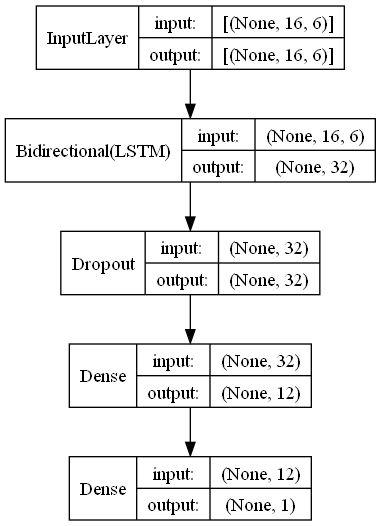

In [6]:
tf.keras.utils.plot_model(model, to_file=os.path.join("result", "model_BiLSTM.png"), show_layer_names=False,  show_shapes=True)

In [7]:
metrics = ["accuracy", tf.keras.metrics.Precision(thresholds=0.5), tf.keras.metrics.Recall(thresholds=0.5)]

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics=metrics)

In [9]:
%%time
hist = model.fit(datagen_train, validation_data=datagen_validation, epochs=EPOCH,
         callbacks= [tf.keras.callbacks.ReduceLROnPlateau(factor=tf.math.exp(-4.1), patience=int(EPOCH*2/10), min_lr=0.0000001)])

Epoch 1/50
235/235 [==============================] - 7s 18ms/step - loss: 0.4621 - accuracy: 0.7595 - precision: 0.0929 - recall: 0.1437 - val_loss: 0.2189 - val_accuracy: 0.9132 - val_precision: 1.0000 - val_recall: 1.0817e-04 - lr: 0.0010
Epoch 2/50
235/235 [==============================] - 4s 16ms/step - loss: 0.2905 - accuracy: 0.8832 - precision: 0.5483 - recall: 0.0675 - val_loss: 0.1794 - val_accuracy: 0.9273 - val_precision: 0.8954 - val_recall: 0.1861 - lr: 0.0010
Epoch 3/50
235/235 [==============================] - 4s 15ms/step - loss: 0.2234 - accuracy: 0.9209 - precision: 0.8149 - recall: 0.3625 - val_loss: 0.1539 - val_accuracy: 0.9414 - val_precision: 0.9362 - val_recall: 0.4105 - lr: 0.0010
Epoch 4/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1939 - accuracy: 0.9293 - precision: 0.7694 - recall: 0.4817 - val_loss: 0.1178 - val_accuracy: 0.9645 - val_precision: 0.9329 - val_recall: 0.6261 - lr: 0.0010
Epoch 5/50
235/235 [========================

<Figure size 1000x500 with 0 Axes>

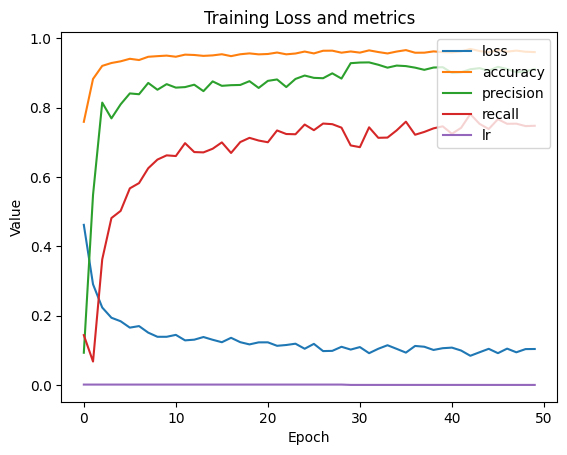

In [10]:
history_df = pd.DataFrame(hist.history)
plt.figure(figsize=(10, 5))
history_df[['loss', 'accuracy', 'precision', 'recall', 'lr']].plot()
plt.title('Training Loss and metrics')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.savefig(os.path.join("result", "model_BiLSTM_plot.png"))
plt.show()

# Evaluate

In [11]:
datagen_test = DataGenerator(TEST_PATH, generate_input, batch_size=BATCH_SIZE, split=1, extension="_.ssm.npy")

In [12]:
%%time
e1 = Evaluation(model, datagen_test)
e1.predict()

Running on GPU


  0%|                                                                                           | 0/88 [00:00<?, ?it/s]

512/512 [==============================] - 2s 3ms/step


  1%|▉                                                                                  | 1/88 [00:02<03:12,  2.21s/it]

512/512 [==============================] - 1s 3ms/step


  2%|█▉                                                                                 | 2/88 [00:03<02:37,  1.83s/it]

512/512 [==============================] - 1s 3ms/step


  3%|██▊                                                                                | 3/88 [00:05<02:24,  1.70s/it]

512/512 [==============================] - 1s 3ms/step


  5%|███▊                                                                               | 4/88 [00:06<02:18,  1.65s/it]

512/512 [==============================] - 1s 3ms/step


  6%|████▋                                                                              | 5/88 [00:08<02:15,  1.63s/it]

512/512 [==============================] - 1s 2ms/step


  7%|█████▋                                                                             | 6/88 [00:09<02:10,  1.59s/it]

512/512 [==============================] - 1s 3ms/step


  8%|██████▌                                                                            | 7/88 [00:11<02:08,  1.58s/it]

512/512 [==============================] - 1s 2ms/step


  9%|███████▌                                                                           | 8/88 [00:13<02:04,  1.56s/it]

512/512 [==============================] - 1s 3ms/step


 10%|████████▍                                                                          | 9/88 [00:14<02:03,  1.56s/it]

512/512 [==============================] - 1s 3ms/step


 11%|█████████▎                                                                        | 10/88 [00:16<02:02,  1.57s/it]

512/512 [==============================] - 1s 3ms/step


 12%|██████████▎                                                                       | 11/88 [00:17<02:00,  1.57s/it]

512/512 [==============================] - 1s 3ms/step


 14%|███████████▏                                                                      | 12/88 [00:19<01:58,  1.56s/it]

512/512 [==============================] - 1s 3ms/step


 15%|████████████                                                                      | 13/88 [00:20<01:56,  1.56s/it]

512/512 [==============================] - 1s 3ms/step


 16%|█████████████                                                                     | 14/88 [00:22<01:54,  1.55s/it]

512/512 [==============================] - 1s 2ms/step


 17%|█████████████▉                                                                    | 15/88 [00:23<01:52,  1.54s/it]

512/512 [==============================] - 1s 2ms/step


 18%|██████████████▉                                                                   | 16/88 [00:25<01:50,  1.53s/it]

512/512 [==============================] - 1s 3ms/step


 19%|███████████████▊                                                                  | 17/88 [00:27<01:51,  1.57s/it]

512/512 [==============================] - 1s 3ms/step


 20%|████████████████▊                                                                 | 18/88 [00:28<01:49,  1.56s/it]

512/512 [==============================] - 1s 2ms/step


 22%|█████████████████▋                                                                | 19/88 [00:30<01:46,  1.55s/it]

512/512 [==============================] - 1s 3ms/step


 23%|██████████████████▋                                                               | 20/88 [00:31<01:47,  1.58s/it]

512/512 [==============================] - 1s 2ms/step


 24%|███████████████████▌                                                              | 21/88 [00:33<01:44,  1.57s/it]

512/512 [==============================] - 1s 3ms/step


 25%|████████████████████▌                                                             | 22/88 [00:34<01:44,  1.58s/it]

512/512 [==============================] - 1s 3ms/step


 26%|█████████████████████▍                                                            | 23/88 [00:36<01:42,  1.58s/it]

512/512 [==============================] - 1s 3ms/step


 27%|██████████████████████▎                                                           | 24/88 [00:38<01:41,  1.58s/it]

512/512 [==============================] - 1s 3ms/step


 28%|███████████████████████▎                                                          | 25/88 [00:39<01:39,  1.59s/it]

512/512 [==============================] - 1s 2ms/step


 30%|████████████████████████▏                                                         | 26/88 [00:41<01:35,  1.55s/it]

512/512 [==============================] - 1s 3ms/step


 31%|█████████████████████████▏                                                        | 27/88 [00:42<01:37,  1.59s/it]

512/512 [==============================] - 1s 2ms/step


 32%|██████████████████████████                                                        | 28/88 [00:44<01:34,  1.57s/it]

512/512 [==============================] - 1s 3ms/step


 33%|███████████████████████████                                                       | 29/88 [00:46<01:32,  1.57s/it]

512/512 [==============================] - 1s 3ms/step


 34%|███████████████████████████▉                                                      | 30/88 [00:47<01:30,  1.56s/it]

512/512 [==============================] - 1s 2ms/step


 35%|████████████████████████████▉                                                     | 31/88 [00:49<01:27,  1.54s/it]

512/512 [==============================] - 1s 2ms/step


 36%|█████████████████████████████▊                                                    | 32/88 [00:50<01:24,  1.52s/it]

512/512 [==============================] - 1s 2ms/step


 38%|██████████████████████████████▊                                                   | 33/88 [00:51<01:23,  1.51s/it]

512/512 [==============================] - 1s 2ms/step


 39%|███████████████████████████████▋                                                  | 34/88 [00:53<01:21,  1.51s/it]

512/512 [==============================] - 1s 3ms/step


 40%|████████████████████████████████▌                                                 | 35/88 [00:55<01:20,  1.53s/it]

512/512 [==============================] - 1s 2ms/step


 41%|█████████████████████████████████▌                                                | 36/88 [00:56<01:19,  1.52s/it]

512/512 [==============================] - 1s 3ms/step


 42%|██████████████████████████████████▍                                               | 37/88 [00:58<01:18,  1.54s/it]

512/512 [==============================] - 1s 2ms/step


 43%|███████████████████████████████████▍                                              | 38/88 [00:59<01:16,  1.54s/it]

512/512 [==============================] - 1s 3ms/step


 44%|████████████████████████████████████▎                                             | 39/88 [01:01<01:15,  1.54s/it]

512/512 [==============================] - 1s 3ms/step


 45%|█████████████████████████████████████▎                                            | 40/88 [01:02<01:13,  1.54s/it]

512/512 [==============================] - 1s 2ms/step


 47%|██████████████████████████████████████▏                                           | 41/88 [01:04<01:11,  1.52s/it]

512/512 [==============================] - 1s 2ms/step


 48%|███████████████████████████████████████▏                                          | 42/88 [01:05<01:09,  1.51s/it]

512/512 [==============================] - 1s 3ms/step


 49%|████████████████████████████████████████                                          | 43/88 [01:07<01:09,  1.55s/it]

512/512 [==============================] - 1s 3ms/step


 50%|█████████████████████████████████████████                                         | 44/88 [01:08<01:07,  1.54s/it]

512/512 [==============================] - 1s 2ms/step


 51%|█████████████████████████████████████████▉                                        | 45/88 [01:10<01:06,  1.54s/it]

512/512 [==============================] - 1s 3ms/step


 52%|██████████████████████████████████████████▊                                       | 46/88 [01:11<01:04,  1.54s/it]

512/512 [==============================] - 1s 2ms/step


 53%|███████████████████████████████████████████▊                                      | 47/88 [01:13<01:02,  1.53s/it]

512/512 [==============================] - 1s 3ms/step


 55%|████████████████████████████████████████████▋                                     | 48/88 [01:15<01:01,  1.54s/it]

512/512 [==============================] - 1s 3ms/step


 56%|█████████████████████████████████████████████▋                                    | 49/88 [01:16<01:00,  1.55s/it]

512/512 [==============================] - 1s 2ms/step


 57%|██████████████████████████████████████████████▌                                   | 50/88 [01:18<00:58,  1.54s/it]

512/512 [==============================] - 1s 3ms/step


 58%|███████████████████████████████████████████████▌                                  | 51/88 [01:19<00:57,  1.54s/it]

512/512 [==============================] - 1s 3ms/step


 59%|████████████████████████████████████████████████▍                                 | 52/88 [01:21<00:55,  1.54s/it]

512/512 [==============================] - 1s 2ms/step


 60%|█████████████████████████████████████████████████▍                                | 53/88 [01:22<00:53,  1.54s/it]

512/512 [==============================] - 1s 3ms/step


 61%|██████████████████████████████████████████████████▎                               | 54/88 [01:24<00:52,  1.55s/it]

512/512 [==============================] - 1s 3ms/step


 62%|███████████████████████████████████████████████████▎                              | 55/88 [01:25<00:51,  1.55s/it]

512/512 [==============================] - 1s 3ms/step


 64%|████████████████████████████████████████████████████▏                             | 56/88 [01:27<00:49,  1.56s/it]

512/512 [==============================] - 1s 3ms/step


 65%|█████████████████████████████████████████████████████                             | 57/88 [01:29<00:48,  1.57s/it]

512/512 [==============================] - 1s 3ms/step


 66%|██████████████████████████████████████████████████████                            | 58/88 [01:30<00:46,  1.57s/it]

512/512 [==============================] - 1s 3ms/step


 67%|██████████████████████████████████████████████████████▉                           | 59/88 [01:32<00:45,  1.56s/it]

512/512 [==============================] - 1s 2ms/step


 68%|███████████████████████████████████████████████████████▉                          | 60/88 [01:33<00:43,  1.54s/it]

512/512 [==============================] - 1s 3ms/step


 69%|████████████████████████████████████████████████████████▊                         | 61/88 [01:35<00:41,  1.54s/it]

512/512 [==============================] - 1s 3ms/step


 70%|█████████████████████████████████████████████████████████▊                        | 62/88 [01:36<00:40,  1.56s/it]

512/512 [==============================] - 1s 3ms/step


 72%|██████████████████████████████████████████████████████████▋                       | 63/88 [01:38<00:38,  1.55s/it]

512/512 [==============================] - 1s 3ms/step


 73%|███████████████████████████████████████████████████████████▋                      | 64/88 [01:39<00:37,  1.56s/it]

512/512 [==============================] - 1s 3ms/step


 74%|████████████████████████████████████████████████████████████▌                     | 65/88 [01:41<00:35,  1.56s/it]

512/512 [==============================] - 1s 2ms/step


 75%|█████████████████████████████████████████████████████████████▌                    | 66/88 [01:43<00:34,  1.55s/it]

512/512 [==============================] - 3725s 7s/step


 76%|█████████████████████████████████████████████████████████▊                  | 67/88 [1:03:48<6:31:32, 1118.70s/it]

512/512 [==============================] - 2s 3ms/step


 77%|███████████████████████████████████████████████████████████▌                 | 68/88 [1:03:50<4:21:12, 783.62s/it]

512/512 [==============================] - 1s 3ms/step


 78%|████████████████████████████████████████████████████████████▍                | 69/88 [1:03:51<2:53:51, 549.02s/it]

512/512 [==============================] - 1s 3ms/step


 80%|█████████████████████████████████████████████████████████████▎               | 70/88 [1:03:53<1:55:26, 384.80s/it]

512/512 [==============================] - 1s 2ms/step


 81%|██████████████████████████████████████████████████████████████               | 71/88 [1:03:54<1:16:26, 269.82s/it]

512/512 [==============================] - 1s 3ms/step


 82%|████████████████████████████████████████████████████████████████▋              | 72/88 [1:03:56<50:29, 189.34s/it]

512/512 [==============================] - 1s 2ms/step


 83%|█████████████████████████████████████████████████████████████████▌             | 73/88 [1:03:58<33:14, 132.99s/it]

512/512 [==============================] - 1s 3ms/step


 84%|███████████████████████████████████████████████████████████████████▎            | 74/88 [1:03:59<21:49, 93.56s/it]

512/512 [==============================] - 1s 3ms/step


 85%|████████████████████████████████████████████████████████████████████▏           | 75/88 [1:04:01<14:17, 65.97s/it]

512/512 [==============================] - 1s 3ms/step


 86%|█████████████████████████████████████████████████████████████████████           | 76/88 [1:04:02<09:19, 46.65s/it]

512/512 [==============================] - 1s 3ms/step


 88%|██████████████████████████████████████████████████████████████████████          | 77/88 [1:04:04<06:04, 33.14s/it]

512/512 [==============================] - 1s 3ms/step


 89%|██████████████████████████████████████████████████████████████████████▉         | 78/88 [1:04:05<03:56, 23.66s/it]

512/512 [==============================] - 1s 3ms/step


 90%|███████████████████████████████████████████████████████████████████████▊        | 79/88 [1:04:07<02:33, 17.02s/it]

512/512 [==============================] - 1s 3ms/step


 91%|████████████████████████████████████████████████████████████████████████▋       | 80/88 [1:04:08<01:38, 12.37s/it]

512/512 [==============================] - 1s 3ms/step


 92%|█████████████████████████████████████████████████████████████████████████▋      | 81/88 [1:04:10<01:03,  9.13s/it]

512/512 [==============================] - 1s 3ms/step


 93%|██████████████████████████████████████████████████████████████████████████▌     | 82/88 [1:04:12<00:41,  6.86s/it]

512/512 [==============================] - 1s 2ms/step


 94%|███████████████████████████████████████████████████████████████████████████▍    | 83/88 [1:04:13<00:26,  5.25s/it]

512/512 [==============================] - 1s 3ms/step


 95%|████████████████████████████████████████████████████████████████████████████▎   | 84/88 [1:04:15<00:16,  4.14s/it]

512/512 [==============================] - 1s 2ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 85/88 [1:04:16<00:10,  3.34s/it]

512/512 [==============================] - 1s 3ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 86/88 [1:04:18<00:05,  2.81s/it]

512/512 [==============================] - 1s 2ms/step


 99%|███████████████████████████████████████████████████████████████████████████████ | 87/88 [1:04:19<00:02,  2.41s/it]

512/512 [==============================] - 1s 2ms/step


100%|████████████████████████████████████████████████████████████████████████████████| 88/88 [1:04:21<00:00, 43.88s/it]


CPU times: total: 3min 6s
Wall time: 1h 4min 24s


In [13]:
e1.eval_()

,precision,recall,MCC,F1,accuracy,IoU
0,0.930729,0.807042,0.85215,0.864484,0.972852,0.761313


In [14]:
e1.eval_().to_json(os.path.join("result", "metrique_BiLSTM.json"))

In [15]:
model.save(MODEL_PATH)

INFO:tensorflow:Assets written to: Model\BiLSTM\assets


INFO:tensorflow:Assets written to: Model\BiLSTM\assets
